In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [86]:
%matplotlib inline

In [8]:
from pandas_datareader import DataReader # read data from yaahoo

from datetime import datetime 

In [9]:
from __future__ import division # for division

In [11]:
# list of texh_stocks for analtytics
tech_list = ['AAPL','GOOGL','MSFT','AMZN']

#set up start and end time for data grab
end = datetime.now()
start = datetime(end.year -1, end.month, end.day) # 1 year back date
print("End time ",end,"Start time ", start)

# for loop for grabbing data and setting as a dataframe
#dataframe as stock ticker
# pip install fix-yahoo-finance (google doesn't work try yahoo)
#globals() function in Python returns the dictionary of current global symbol table.
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo' , start, end)

End time  2020-04-26 15:20:04.806716 Start time  2019-04-26 00:00:00


In [18]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-25,207.759995,205.119995,206.830002,205.279999,18543200.0,202.627808
2019-04-26,205.000000,202.119995,204.899994,204.300003,18649100.0,201.660461
2019-04-29,205.970001,203.860001,204.399994,204.610001,22204700.0,201.966461
2019-04-30,203.399994,199.110001,203.059998,200.669998,46534900.0,198.077362
2019-05-01,215.309998,209.229996,209.880005,210.520004,64827300.0,207.800110


In [16]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,245.821620,240.308459,242.749841,243.280671,3.339773e+07,242.254871
std,43.231709,41.982066,42.473172,42.845108,1.730345e+07,43.384740
min,177.919998,170.270004,175.440002,173.300003,1.136200e+07,171.719727
25%,206.500000,203.500000,204.399994,204.610001,2.181180e+07,202.635223
50%,242.199997,234.880005,237.520004,239.960007,2.825340e+07,238.675293
75%,280.790009,271.859985,276.279999,275.429993,3.813280e+07,275.429993
max,327.850006,323.350006,324.739990,327.200012,1.067212e+08,327.200012


In [17]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-04-25 to 2020-04-24
Data columns (total 6 columns):
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Close        253 non-null float64
Volume       253 non-null float64
Adj Close    253 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


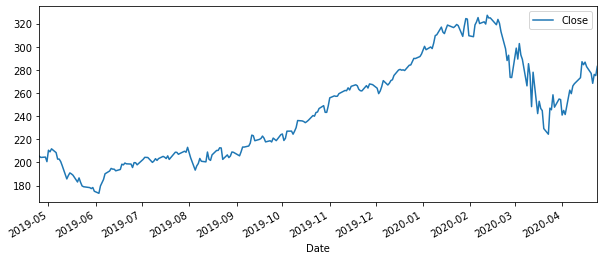

In [28]:
#plot is the DataFrame func in pandas
AAPL['Close'].plot(legend = True, figsize = (10,4))

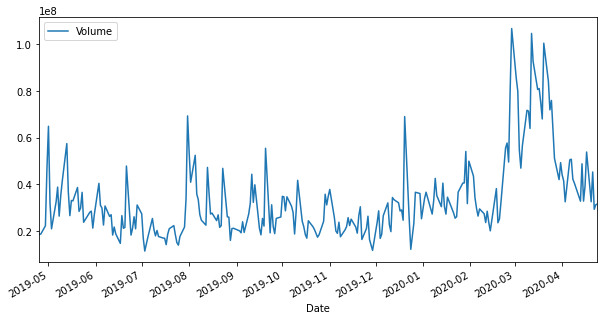

In [35]:
AAPL['Volume'].plot(legend = True, figsize= (10,5)) 

In [42]:
MA_day = [10,20,50,100] 
# pandas rolling mean calculator?
for ma in MA_day:
    column_name = 'MA for %s days'%(str(ma))
    AAPL[column_name] = AAPL['Close'].rolling(ma).mean()

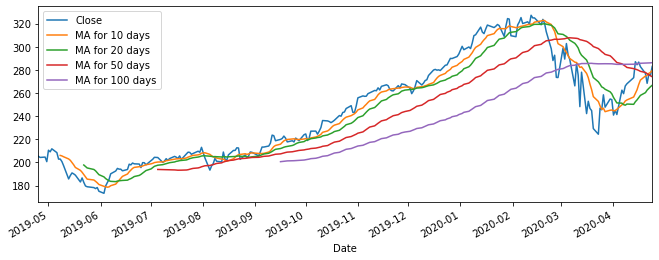

In [51]:
AAPL[['Close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots = False, figsize = (11,4))

Daily REturn Analysis

In [57]:
#pct_changes find the percentage with the previos row
AAPL['Daily Return']=AAPL['Close'].pct_change()

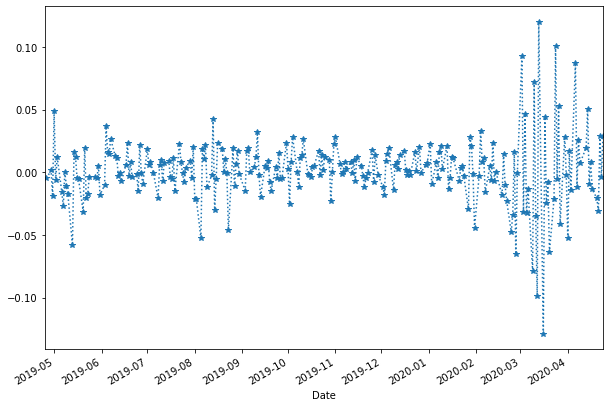

In [65]:
AAPL['Daily Return'].plot(marker = '*', figsize=(10,7), linestyle = ':')

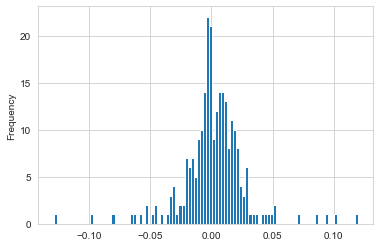

In [88]:
AAPL['Daily Return'].plot(kind = 'hist', bins=100)

In [74]:
#find missing value count
AAPL['Daily Return'].shape[0] - AAPL['Daily Return'].dropna().shape[0]

1

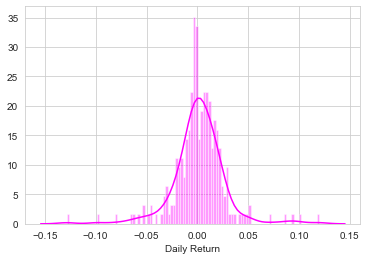

In [87]:
#
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color ='magenta')

In [90]:
closing_price = DataReader(tech_list, 'yahoo',start,end)['Close']

In [91]:
closing_price.head()

Symbols,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2019-04-25,205.279999,1902.250000,1267.339966,129.149994
2019-04-26,204.300003,1950.630005,1277.420044,129.889999
2019-04-29,204.610001,1938.430054,1296.199951,129.770004
2019-04-30,200.669998,1926.520020,1198.959961,130.600006
2019-05-01,210.520004,1911.520020,1173.319946,127.879997


In [92]:
closing_price_changes = closing_price.pct_change()

In [93]:
closing_price_changes.head()

Symbols,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2019-04-25,NaN,NaN,NaN,NaN
2019-04-26,-0.004774,0.025433,0.007954,0.005730
2019-04-29,0.001517,-0.006254,0.014701,-0.000924
2019-04-30,-0.019256,-0.006144,-0.075019,0.006396
2019-05-01,0.049086,-0.007786,-0.021385,-0.020827


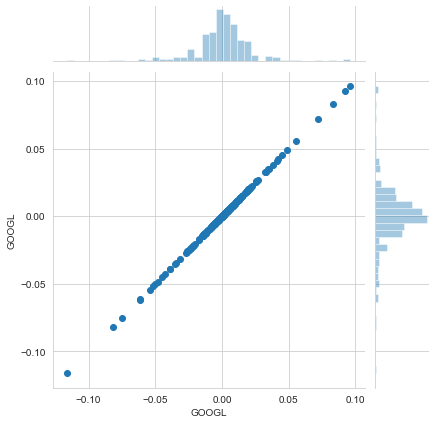

In [95]:
sns.jointplot('GOOGL','GOOGL',closing_price_changes)

we can see that if two stock are positive corelated with each other a linear relationship between its daily return value 

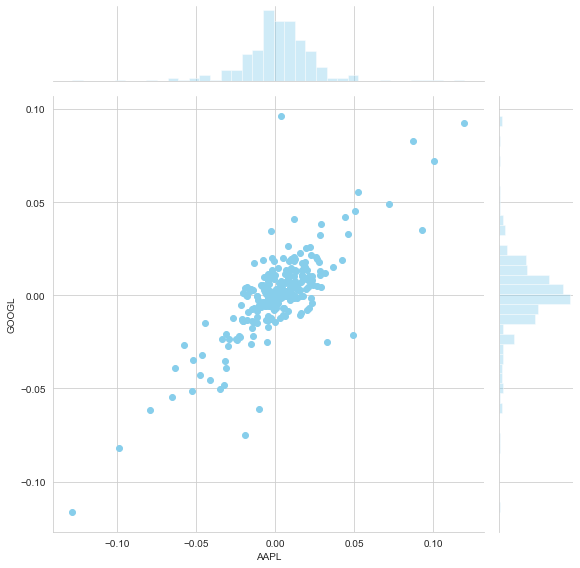

In [98]:
sns.jointplot('AAPL','GOOGL',closing_price_changes, kind = 'scatter', height = 8, color = 'skyblue')

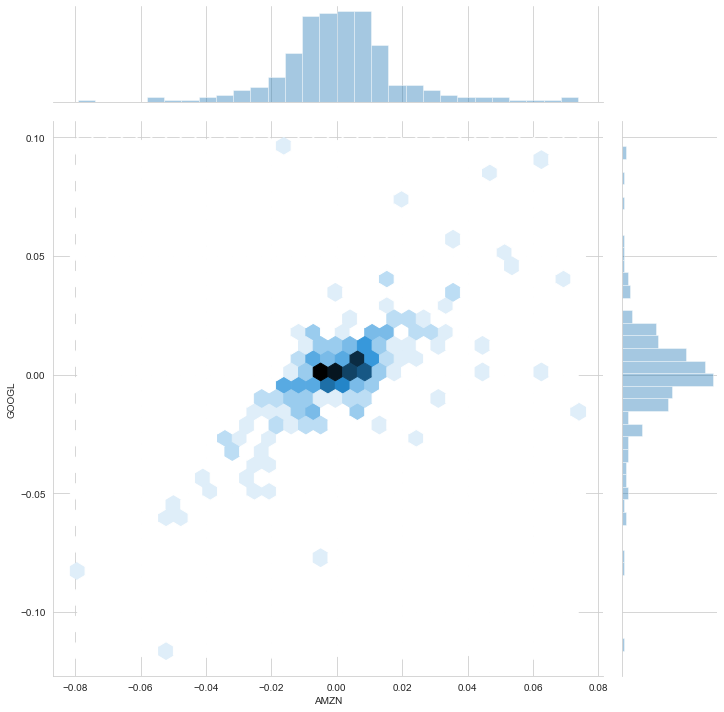

In [103]:
# with hex plot
sns.jointplot('AMZN','GOOGL',closing_price_changes, kind = 'hex', height = 10)

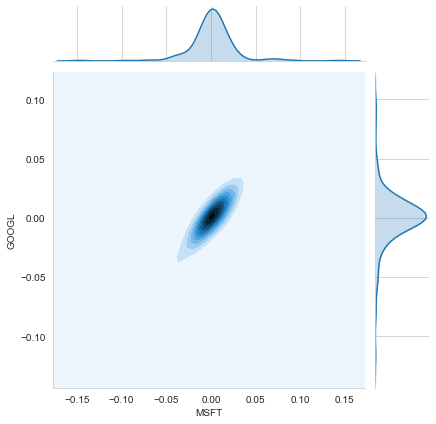

In [104]:
sns.jointplot('MSFT','GOOGL',closing_price_changes, kind = 'kde')

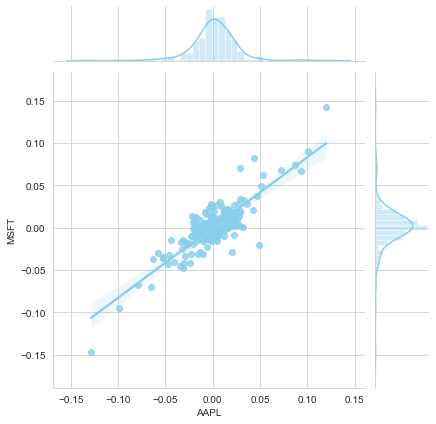

In [120]:
sns.jointplot('AAPL','MSFT',closing_price_changes, kind= 'reg', color = 'skyblue')

In [ ]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination. we can use sns.pairplot to automatically create this plot

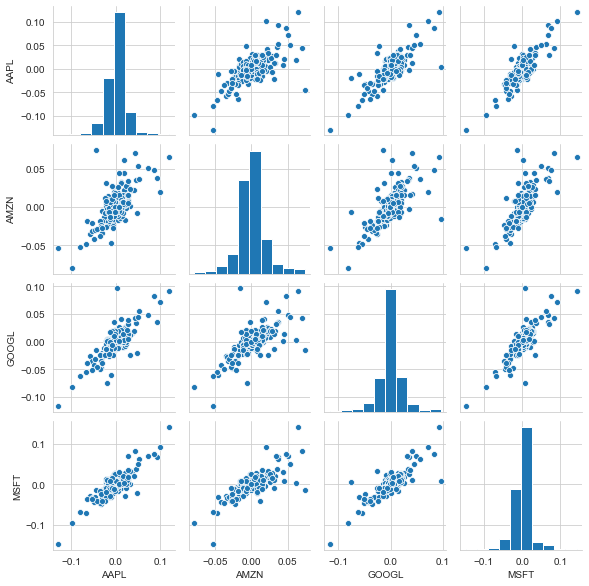

In [119]:
sns.pairplot(closing_price_changes.dropna(), height =2)

Above we can see all the realationship between all the stocks. A quick glance show an interesting corelation between google and Amazin daily return. sns.pairplot is the fantastic way to display the result. We can make use of pairgrid for full control of the figure

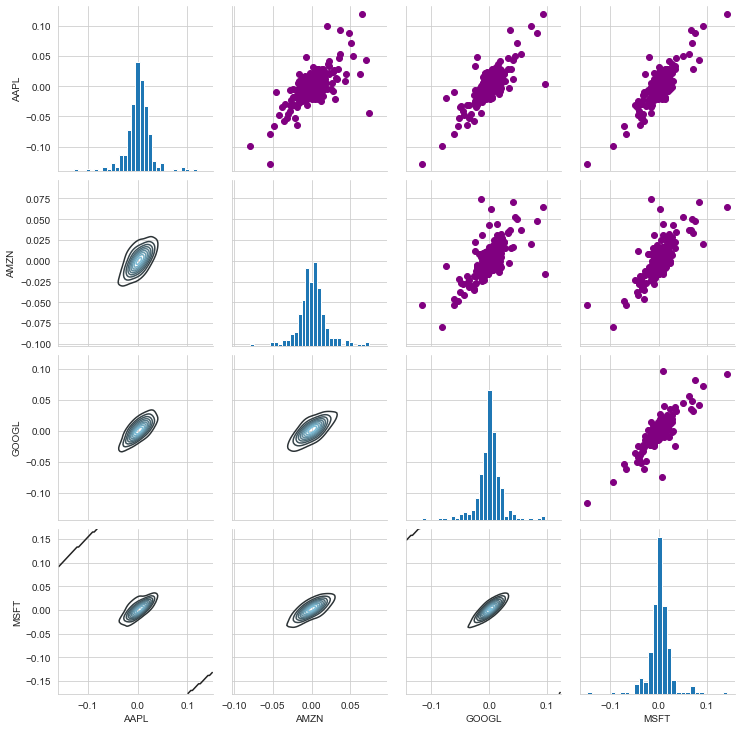

In [126]:
return_fig =sns.PairGrid(closing_price_changes.dropna())
#defune the upper triangle
return_fig.map_upper(plt.scatter, color='purple')
#define the lower triangle
return_fig.map_lower(sns.kdeplot, color='skyblue')
#finally we define the diagonal as a series of histogram
return_fig.map_diag(plt.hist, bins= 30)

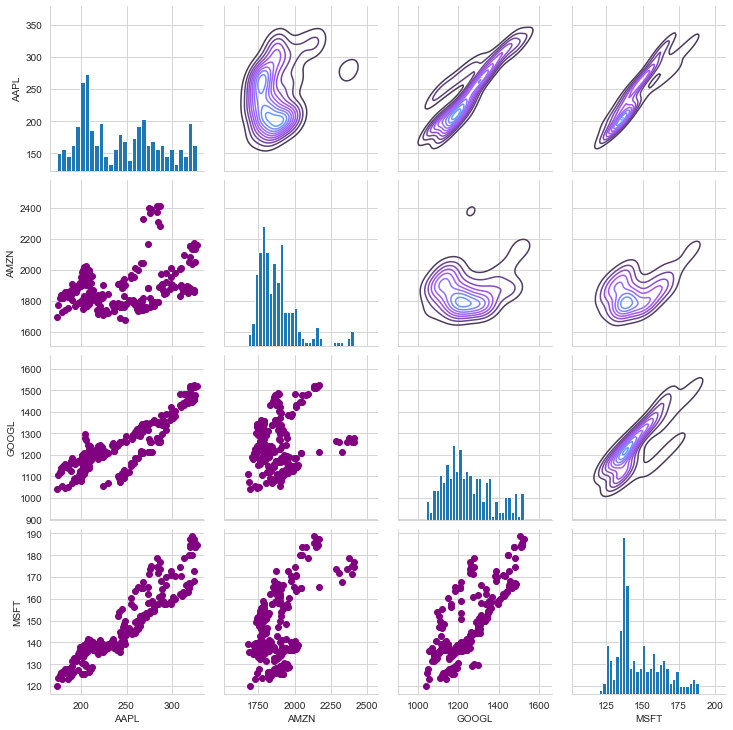

In [132]:
returns_fig1 = sns.PairGrid(closing_price.dropna())
returns_fig1.map_lower(plt.scatter, color='purple')
returns_fig1.map_upper(sns.kdeplot, cmap = 'cool_d')
returns_fig1.map_diag(plt.hist, bins = 30)

We can get the corelation plot of the closing_price

In [138]:
closing_price_changes.corr()

Symbols,AAPL,AMZN,GOOGL,MSFT
Symbols,,,,
AAPL,1.000000,0.681783,0.796598,0.853935
AMZN,0.681783,1.000000,0.691321,0.761124
GOOGL,0.796598,0.691321,1.000000,0.840180
MSFT,0.853935,0.761124,0.840180,1.000000


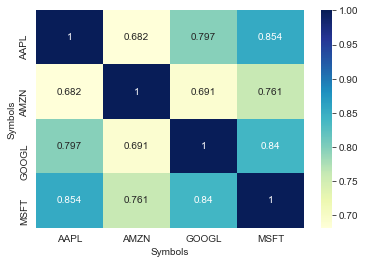

In [143]:
# Let's go ahead and use seaborn for a quick heatmap to get correlation for the daily return of the stocks.
# annot=> to wite the value inside the box
#fmt = to show the right corner line 
sns.heatmap(closing_price_changes.corr(), annot= True, fmt = ".3g", cmap= 'YlGnBu')

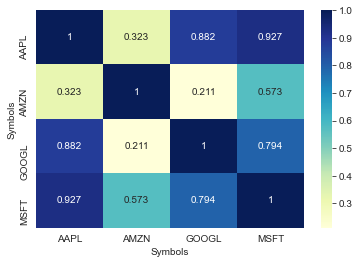

In [144]:
# check the same for closing_price
sns.heatmap(closing_price.corr(), annot= True, fmt = ".3g", cmap= 'YlGnBu')

we can visualize the strong corelation between daily stock return


# Risk Analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns(Risk).

In [151]:
rets = closing_price_changes.dropna()

In [159]:
rets.head()
rets.mean()
rets.std()
rets.columns

Index(['AAPL', 'AMZN', 'GOOGL', 'MSFT'], dtype='object', name='Symbols')

AAPL 0.0016054440862689086 0.025741477997015875
AMZN 0.0011213238989132687 0.019134046215842367
GOOGL 0.00028889191889635196 0.02278511977923454
MSFT 0.0015085559965708321 0.025016949942298895


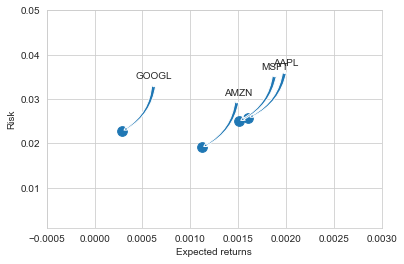

In [167]:
area = np.pi * 30
plt.scatter(rets.mean(),rets.std(), s=area)
plt.xlim([-0.0005,0.0030])
plt.ylim([0.001,0.050])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns, rets.mean(), rets.std()):
    print(label,x,y)
    plt.annotate(label,
                xy = (x,y), xytext = (50,50),
                textcoords = 'offset points', ha = 'right', va = 'bottom',
                arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'arc3,rad=-0.3'))

From the above graph it is clear that the lower risk and the positive expected returns


Value at Risk

Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. There's several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

Value at risk using the "bootstrap" method
For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Let's go ahead and repeat the daily returns histogram for Apple stock.

In [168]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,MA for 100 days,Daily Return
Date,,,,,,,,,,,
2019-04-25,207.759995,205.119995,206.830002,205.279999,18543200.0,202.627808,NaN,NaN,NaN,NaN,NaN
2019-04-26,205.000000,202.119995,204.899994,204.300003,18649100.0,201.660461,NaN,NaN,NaN,NaN,-0.004774
2019-04-29,205.970001,203.860001,204.399994,204.610001,22204700.0,201.966461,NaN,NaN,NaN,NaN,0.001517
2019-04-30,203.399994,199.110001,203.059998,200.669998,46534900.0,198.077362,NaN,NaN,NaN,NaN,-0.019256
2019-05-01,215.309998,209.229996,209.880005,210.520004,64827300.0,207.800110,NaN,NaN,NaN,NaN,0.049086


# make use of dropna to drop the NAN values
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'orange')

In [185]:
rets['AAPL'].quantile(0.05)

-0.034258428085985886

The 0.05 empirical quantile of daily returns is at -0.034. That means that with 95% confidence, our worst daily loss will not exceed 3.4%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.034 * 1,000,000 = $34,000.

Now we will calculate the quantile for all the stock

In [186]:
rets['AMZN'].quantile(0.05) # here 2.7 percent

-0.02763362405276297

In [187]:
rets['GOOGL'].quantile(0.06) # here 3.1 percent

-0.0315596664671461

In [188]:
rets['MSFT'].quantile(0.06)

-0.03161020254599245

Value at Risk using the Monte Carlo method

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each time period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks and simulating stock prices with GBM model ie. geometric Brownian motion (GBM).

check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using in the Google stock DataFrame GOOGL

In [192]:
# set our time horizon
days = 365

#now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for GOOGL
mu = rets.mean()['GOOGL']

# Now let's grab the volatility of the stock from the std() of the average return for GOOGL
sigma = rets.std()['GOOGL']

In [196]:
def stock_monte_carlo(start_price, days,mu,sigma):
    price = np.zeros(days)
    price[0]= start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        #calculate Shock
        shock[x] = np.random.normal(loc = mu * dt, scale = sigma * np.sqrt(dt))
        #Calculate Drift
        drift[x] = mu * dt
        #calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    
    return price

In [194]:
GOOGL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-25,1272.800049,1258.000000,1270.300049,1267.339966,1567200,1267.339966
2019-04-26,1278.910034,1265.000000,1273.380005,1277.420044,1361400,1277.420044
2019-04-29,1296.969971,1271.709961,1280.510010,1296.199951,3618400,1296.199951
2019-04-30,1200.979980,1183.000000,1190.630005,1198.959961,6658900,1198.959961
2019-05-01,1199.250000,1171.680054,1197.500000,1173.319946,3717000,1173.319946


Text(0.5, 1.0, 'Monto Carlo Analysis for Google')

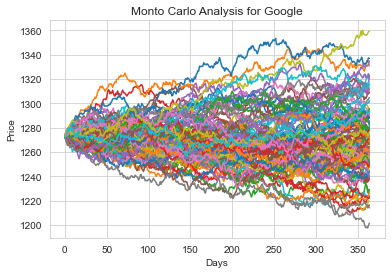

In [197]:
start_price= 1272.80

for i in range(100):
    plt.plot(stock_monte_carlo(start_price, days,mu,sigma))

plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Monto Carlo Analysis for Google")

In [198]:
AMZN.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-25,1922.449951,1900.310059,1917.000000,1902.250000,6099100,1902.250000
2019-04-26,1951.000000,1898.000000,1929.000000,1950.630005,8432600,1950.630005
2019-04-29,1956.339966,1934.089966,1949.000000,1938.430054,4021300,1938.430054
2019-04-30,1935.709961,1906.949951,1930.099976,1926.520020,3506000,1926.520020
2019-05-01,1943.640015,1910.550049,1933.089966,1911.520020,3117000,1911.520020


Text(0.5, 1.0, 'Monto Carlo Amazon Analysis')

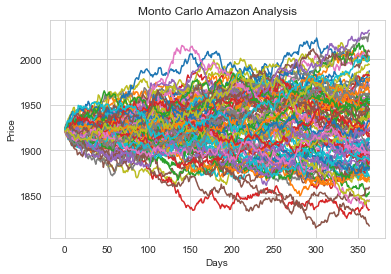

In [201]:
start_price =1922.45

for i in range(100):
    plt.plot(stock_monte_carlo(start_price, days,mu,sigma))

plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Monto Carlo Amazon Analysis")

In [202]:
MSFT.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-25,131.369995,128.830002,130.059998,129.149994,38033900.0,127.463577
2019-04-26,130.520004,129.020004,129.699997,129.889999,23654900.0,128.193909
2019-04-29,130.179993,129.350006,129.899994,129.770004,16324200.0,128.075485
2019-04-30,130.699997,129.389999,129.809998,130.600006,24166500.0,128.894653
2019-05-01,130.649994,127.699997,130.529999,127.879997,26821700.0,126.210159


Text(0.5, 1.0, 'Monto Carlo Analysis For Microsoft')

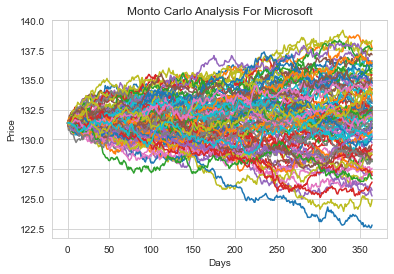

In [203]:
# for microsoft
start_price = 131.37

for i in range(100):
    plt.plot(stock_monte_carlo(start_price, days,mu,sigma))

plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Monto Carlo Analysis For Microsoft")

Let's go ahead and get a histogram of the end results for a much larger run. (note: This could take a little while to run , depending on the number of runs chosen)

In [205]:
start_price = 1272.80

runs = 10000
simulation = np.zeros(runs)

for i in range(10000):
    simulation[i] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.

For more info on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Text(0.5, 1.0, 'Final price distribution for Google Stock(GOOGL) after 365 days')

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\IPython\core\pylabtools.py:132: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


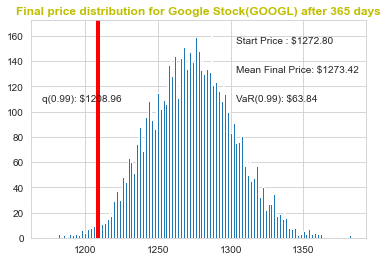

In [221]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulation,1)
plt.hist(simulation, bins = 200)
# Using plt.figtext to fill in some additional information onto the plot

#Starting price
plt.figtext(0.6,0.8, s='Start Price : $%.2f'%start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulation.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title(label="Final price distribution for Google Stock(GOOGL) after %s days" % days, weight='bold', color='Y')

Awesome! Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google Stock(GOOGL), which looks to be $63.84 for every investment of 1272.80 (The price of one initial Google Stock).

This basically means for every initial GOOGL stock you purchase you're putting about $63.84 at risk 99% of the time from our Monte Carlo Simulation.

Now lets plot remaining Stocks to estimate the VaR with our Monte Carlo Simulation.

In [233]:
start_price = 1922.45

runs = 10000
simulation = np.zeros(runs)

for i in range(10000):
    simulation[i] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Google Stock(AMZN) after 365 days')

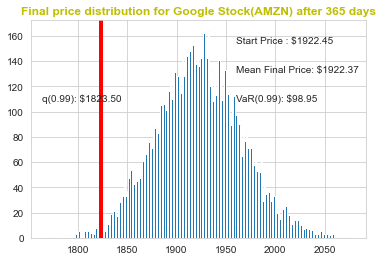

In [234]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulation,1)
plt.hist(simulation, bins = 200)
# Using plt.figtext to fill in some additional information onto the plot

#Starting price
plt.figtext(0.6,0.8, s='Start Price : $%.2f'%start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulation.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title(label="Final price distribution for Google Stock(AMZN) after %s days" % days, weight='bold', color='Y')

Now lets estiamte the Value at Risk(VaR) for a stock related to other domains.

We'll estimate the VaR for:

Johnson & Johnson > JNJ (U.S.: NYSE) JNJ

Wal-Mart Stores Inc. > WMT (U.S.: NYSE) WMT

Nike Inc. > NKE (U.S.: NYSE) NKE

By using the above methods to get Value at Risk.

In [237]:
nyse_list = ['JNJ','WMT','NKE']

end_date = datetime.now()
start_date = datetime(end_date.year-1, end_date.month, end_date.day)
print(start_date, end_date)


for i in nyse_list:
    globals()[i] = DataReader(i,'yahoo', start_date, end_date)

2019-04-26 00:00:00 2020-04-26 19:12:41.884750


In [239]:
JNJ.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,138.560000,136.011028,137.314071,137.372055,8.286792e+06,135.700679
std,7.414724,7.907043,7.578994,7.743751,4.075644e+06,8.038755
min,118.559998,109.160004,117.000000,111.139999,2.923300e+06,111.139999
25%,132.130005,130.059998,131.250000,131.130005,5.523000e+06,128.831940
50%,138.270004,135.649994,137.039993,137.169998,7.037500e+06,134.960007
75%,143.639999,140.910004,141.910004,142.089996,9.951100e+06,141.229996
max,157.000000,153.699997,155.570007,155.509995,2.586870e+07,155.509995


In [240]:
JNJ.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-25,139.770004,137.960007,138.520004,139.649994,5218100.0,135.855789
2019-04-26,140.520004,139.309998,139.880005,140.389999,4613600.0,136.575699
2019-04-29,140.429993,139.580002,140.350006,139.839996,4275200.0,136.040634
2019-04-30,141.449997,138.960007,140.190002,141.199997,6003700.0,137.363678
2019-05-01,142.350006,139.750000,140.949997,141.949997,6656300.0,138.093307


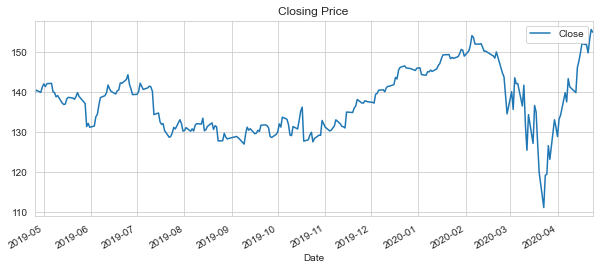

In [246]:
#legend =
JNJ['Close'].plot(title = 'Closing Price',x = 'Month',y = 'Price',legend = True, figsize= (10,4))

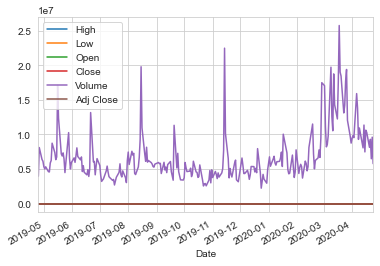

In [247]:
# Let's see a historical view of the closing price for WMT(Wal-Mart Stores Inc.)
WMT.plot()

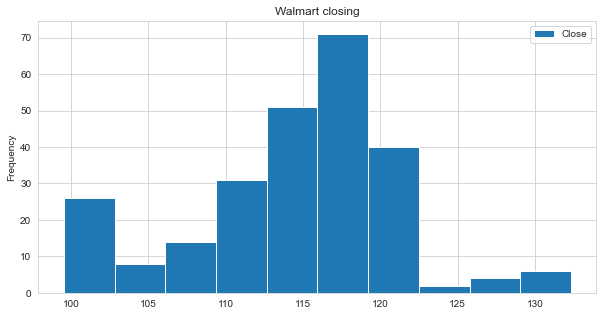

In [253]:
# Let's see a historical view of the closing price for WMT(Wal-Mart Stores Inc.)
WMT['Close'].plot(kind = 'hist', legend= True, figsize = (10,5), title ="Walmart closing")

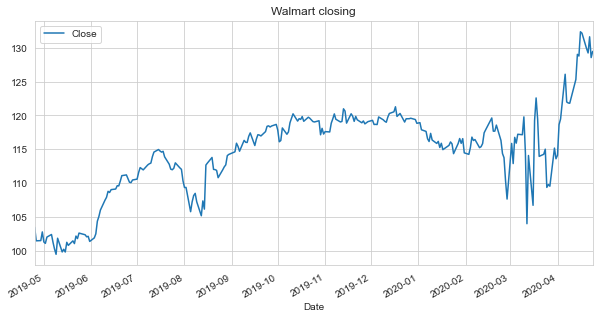

In [254]:
WMT['Close'].plot(legend= True, figsize = (10,5), title ="Walmart closing")

In [257]:
JNJ['Daily Return'] = JNJ['Close'].pct_change()

In [258]:
JNJ.head()

,High,Low,Open,Close,Volume,Adj Close,Daily Return
Date,,,,,,,
2019-04-25,139.770004,137.960007,138.520004,139.649994,5218100.0,135.855789,NaN
2019-04-26,140.520004,139.309998,139.880005,140.389999,4613600.0,136.575699,0.005299
2019-04-29,140.429993,139.580002,140.350006,139.839996,4275200.0,136.040634,-0.003918
2019-04-30,141.449997,138.960007,140.190002,141.199997,6003700.0,137.363678,0.009725
2019-05-01,142.350006,139.750000,140.949997,141.949997,6656300.0,138.093307,0.005312


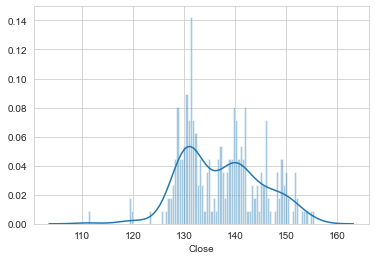

In [260]:
#bins => seperation
sns.distplot(JNJ['Close'].dropna(), bins = 100)

In [261]:
JNJ['Daily Return'].dropna().quantile(0.05)

-0.029069305836347134

The 0.05 empirical quantile of JNJ stock daily returns is at -0.010. That means that with 95% confidence, our worst daily loss will not exceed 1%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.029 * 100= $29.

In [266]:
WMT['Daily Return'] = WMT['Close'].pct_change()

In [267]:
WMT.head()

,High,Low,Open,Close,Volume,Adj Close,Daily Return
Date,,,,,,,
2019-04-25,104.150002,102.830002,103.239998,103.519997,3961100.0,101.561638,NaN
2019-04-26,102.339996,99.660004,100.449997,101.529999,8107700.0,99.609291,-0.019223
2019-04-29,102.000000,100.779999,101.879997,101.559998,6379700.0,99.638718,0.000295
2019-04-30,102.919998,101.449997,101.769997,102.839996,6133600.0,100.894508,0.012603
2019-05-01,102.809998,101.279999,102.769997,101.360001,5337200.0,99.442505,-0.014391


In [269]:
WMT['Daily Return'].dropna().quantile(0.05)

-0.019492478677269703

The 0.05 empirical quantile of WMT stock daily returns is at -0.013. That means that with 95% confidence, our worst daily loss will not exceed 1.9%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.019 * 1,000,000 = $19,000.

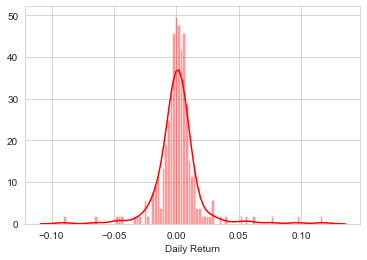

In [272]:
# use lower case in color bcozz uppercase is deprected
sns.distplot(WMT['Daily Return'].dropna(), bins = 100, color = 'r')

In [279]:
# Repeat for Nike
NKE['Daily Return'] = NKE['Close'].pct_change()

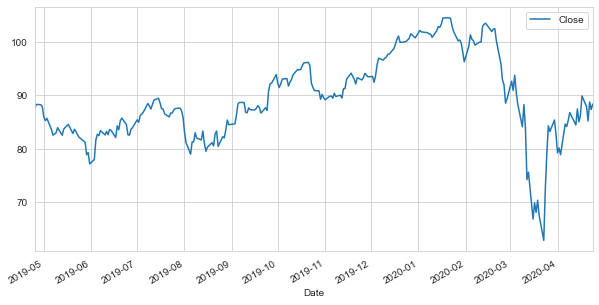

In [277]:
NKE['Close'].plot(legend = True, figsize= (10,5))

In [280]:
NKE.head()

,High,Low,Open,Close,Volume,Adj Close,Daily Return
Date,,,,,,,
2019-04-25,88.540001,87.489998,88.400002,87.559998,7069900.0,86.624985,NaN
2019-04-26,88.940002,87.330002,87.949997,88.309998,6219600.0,87.366974,0.008566
2019-04-29,88.510002,88.129997,88.180000,88.260002,5008400.0,87.317513,-0.000566
2019-04-30,88.400002,87.260002,88.290001,87.830002,7614100.0,86.892097,-0.004872
2019-05-01,87.949997,85.870003,87.730003,85.900002,6524600.0,84.982697,-0.021974


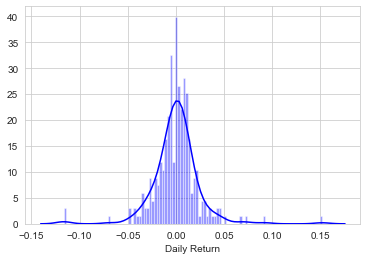

In [284]:
sns.distplot(NKE['Daily Return'].dropna(), bins = 100, color = 'b')

In [285]:
NKE['Daily Return'].dropna().quantile(0.05)

-0.032482399268388966

The 0.05 empirical quantile of NKE stock daily returns is at -0.032. That means that with 95% confidence, our worst daily loss will not exceed 3.2%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.032 * 1,000,000 = $32,000.